In [1]:
import os
import csv
import gzip

import numpy as np
import pandas as pd
from math import sin, cos, sqrt, atan2, radians
import copy
import pickle

from datetime import datetime as dt
from datetime import timedelta
from datetime import timezone
import pytz

from matplotlib.colors import LogNorm
import matplotlib.colors as mcolors
import mpl_toolkits.axes_grid1
from matplotlib.colors import DivergingNorm

### import data4resilience toolkit 
from d4r_toolkit import data_preprocess
from d4r_toolkit import displacement
from d4r_toolkit import mobanalytics
from d4r_toolkit import utils
from d4r_toolkit import viz

# load data for selected IDs

In [ ]:
### all data for target IDs (computed in notebook #2)
alldataf = "D:/WB_Mexico/results_eq/selectedids_all_data.csv"

# compute day- and night-time locations

In [3]:
chunk = 10000
staypointfile = "D:/WB_Mexico/results_eq/id_date_stalocs.csv"

In [ ]:
getdensitydata(staypointfile, alldataf, chunk)

In [ ]:
def getdensitydata(metricsf, alldataf, chunk):
    with open(metricsf, 'w') as csvfile:
        writer = csv.writer(csvfile, lineterminator='\n')    
        done_IDs = set()
        count = 100 ### just for initial value
        while count > 0:
            id_dt_ll = data_intomap(alldataf, done_IDs, chunk)
            calc_staypoint(id_dt_ll, df_idhome, writer)
            for thisid in id_dt_ll.keys():
                done_IDs.add(thisid)
            count = len(id_dt_ll)
            print("done",len(done_IDs),count,dt.now(),dt.now()-start)

# plot density maps

In [4]:
normaldays = ["20170904","20170905","20170906","20170907","20170908",
              "20170911","20170912","20170913","20170914","20170915"]

## population density

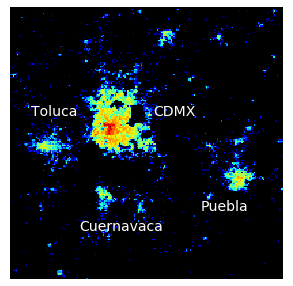

In [759]:
date = "20170920"

df = pd.read_csv(staypointfile, header=None, 
                 names=["id","date","label","dlon","dlat","nlon","nlat"])
df3 = df[(df["date"]==date) & (df["label"]=="daytime")]
df2 = df3[df3["dlon"]!=0]

fig = plt.figure(figsize=(5,5))
gs=GridSpec(1,1)
ax = fig.add_subplot(gs[0,0]) 
heatmap = density_map(df2["dlat"],df2["dlon"],(19.3, -98.9), 200, 1, ax)

## standard deviation

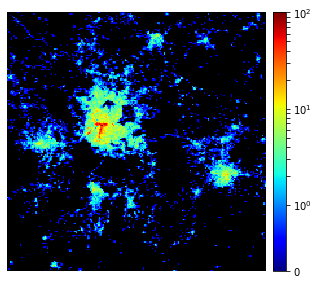

In [782]:
stdmaps_d = []
for normal in normals:
    df = pd.read_csv(staypointfile, header=None, 
                     names=["id","date","label","dlon","dlat","nlon","nlat"])
    df3 = df[(df["date"]==normal) & (df["label"]=="daytime")]
    df2 = df3[df3["dlon"]!=0]
    heatmap = density_nomap(df2["dlat"],df2["dlon"],(19.3, -98.9), 200, 1)
    stdmaps_d = (heatmap[0].T - avgmaps_d)**2 if stdmaps_d == [] else stdmaps_d + (heatmap[0].T - avgmaps_d)**2
    print(normal)
stdmaps_d = np.sqrt(stdmaps_d/10)

fig = plt.figure(figsize=(5,5))
gs=GridSpec(1,1)
ax = fig.add_subplot(gs[0,0])
shori_density_map(stdmaps_d, heatmap[1], heatmap[2], (19.3, -98.9), 1, ax, False,0,100)

## z-scores

In [ ]:
center = (19.3, -98.9)
bins = 200
rad = 1

In [5]:
### get average and standard deviation for all normal days
avgmaps_d,avgmaps_n,stdmaps_d,stdmaps_n = mobanalytics.getdensity_mean_std(outpath, normaldays, center, bins, rad)

In [6]:
df = pd.read_csv(staypointfile, header=None, 
                 names=["id","date","label","dlon","dlat","nlon","nlat"])
df3 = df[(df["date"]=="20170919") & (df["label"]=="daytime")]
df2 = df3[df3["dlon"]!=0]
heatmap_d = density_nomap(df2["dlat"],df2["dlon"], center, bins, rad)
thismap_d = (heatmap_d[0].T-avgmaps_d)/stdmaps_d

df3 = df[df["nlon"]!=0]
heatmap_n = density_nomap(df3["nlat"],df3["nlon"], center, bins, rad)
thismap_n = (heatmap_n[0].T-avgmaps_n)/stdmaps_n

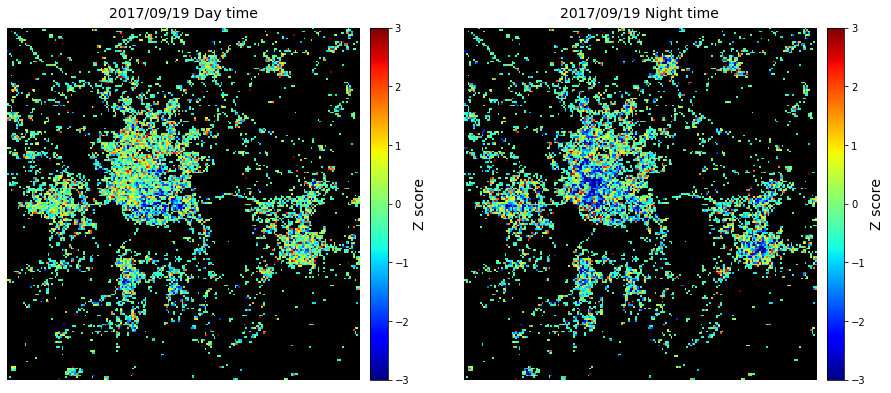

In [813]:
fig = plt.figure(figsize=(15,10))
gs=GridSpec(1,2)
ax = fig.add_subplot(gs[0,0])
shori_density_map_norm(thismap_d, heatmap[1], heatmap[2], (19.3, -98.9), 1, ax, False, 
                       "2017/09/19 Day time", -5,5)

ax = fig.add_subplot(gs[0,1])
shori_density_map_norm(thismap_n, heatmap[1], heatmap[2], (19.3, -98.9), 1, ax, False,
                       "2017/09/19 Night time", -5,5)

plt.savefig("C:/users/yabec/desktop/all_zscore_0919.png",
            dpi=300, bbox_inches='tight', pad_inches=0.05)

plt.show()

### zoom in CDMX

In [ ]:
center = (19.43, -99.13)
rad = .3
bins = int(500*rad)

In [ ]:
avgmaps_d,avgmaps_n,stdmaps_d,stdmaps_n = mobanalytics.getdensity_mean_std(outpath, normaldays, center, bins, rad)

In [829]:
df = pd.read_csv(staypointfile, header=None, 
                 names=["id","date","label","dlon","dlat","nlon","nlat"])
df3 = df[(df["date"]=="20170919") & (df["label"]=="daytime")]
df2 = df3[df3["dlon"]!=0]
heatmap_d = density_nomap(df2["dlat"],df2["dlon"], center, bins, rad)
thismap_d = (heatmap_d[0].T-avgmaps_d)/stdmaps_d

df3 = df[df["nlon"]!=0]
heatmap_n = density_nomap(df3["nlat"],df3["nlon"], center, bins, rad)
thismap_n = (heatmap_n[0].T-avgmaps_n)/stdmaps_n

C:\Users\yabec\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
C:\Users\yabec\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
C:\Users\yabec\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
C:\Users\yabec\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


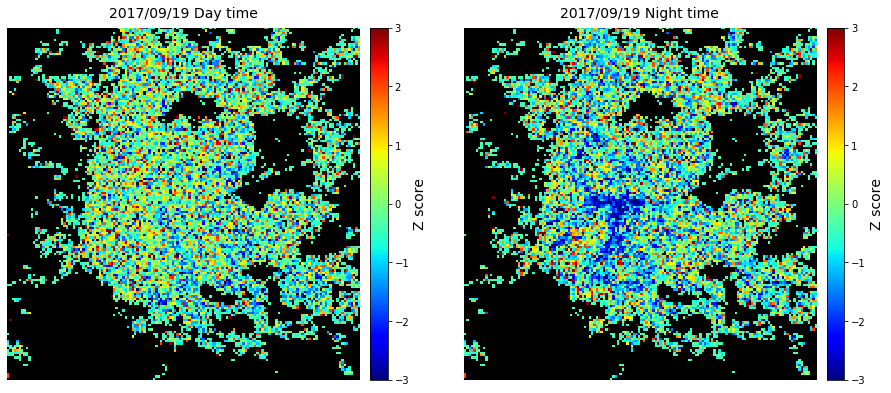

In [830]:
fig = plt.figure(figsize=(15,10))
gs=GridSpec(1,2)
ax = fig.add_subplot(gs[0,0])
shori_density_map_norm(thismap_d, heatmap[1], heatmap[2], center,rad, ax, False, 
                       "2017/09/19 Day time", -5,5)

ax = fig.add_subplot(gs[0,1])
shori_density_map_norm(thismap_n, heatmap[1], heatmap[2], center,rad, ax, False,
                       "2017/09/19 Night time", -5,5)

# plt.savefig("C:/users/yabec/desktop/cdmx_zscore_0919.png",
#             dpi=300, bbox_inches='tight', pad_inches=0.05)

plt.show()

### zoom in Puebla

In [ ]:
center = (19.03, -98.2)
rad = .2
bins = int(500*rad)

In [833]:
df = pd.read_csv(staypointfile, header=None, 
                 names=["id","date","label","dlon","dlat","nlon","nlat"])
df3 = df[(df["date"]=="20170919") & (df["label"]=="daytime")]
df2 = df3[df3["dlon"]!=0]
heatmap_d = density_nomap(df2["dlat"],df2["dlon"], center, bins, rad)
thismap_d = (heatmap_d[0].T-avgmaps_d)/stdmaps_d

df3 = df[df["nlon"]!=0]
heatmap_n = density_nomap(df3["nlat"],df3["nlon"], center, bins, rad)
thismap_n = (heatmap_n[0].T-avgmaps_n)/stdmaps_n

C:\Users\yabec\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
C:\Users\yabec\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
C:\Users\yabec\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
C:\Users\yabec\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


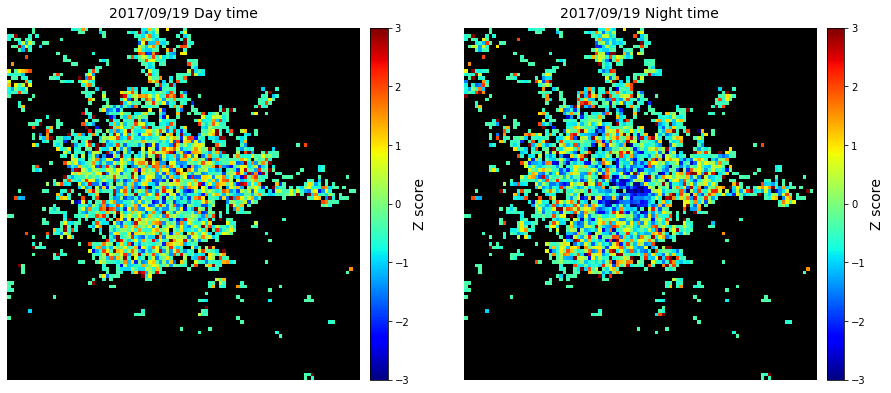

In [834]:
fig = plt.figure(figsize=(15,10))
gs=GridSpec(1,2)
ax = fig.add_subplot(gs[0,0])
shori_density_map_norm(thismap_d, heatmap[1], heatmap[2], center,rad, ax, False, 
                       "2017/09/19 Day time", -5,5)

ax = fig.add_subplot(gs[0,1])
shori_density_map_norm(thismap_n, heatmap[1], heatmap[2], center,rad, ax, False,
                       "2017/09/19 Night time", -5,5)

# plt.savefig("C:/users/yabec/desktop/puebla_zscore_0919.png",
#             dpi=300, bbox_inches='tight', pad_inches=0.05)

plt.show()